In [ ]:
#!/usr/bin/env python3

from smodels.base import runtime
from smodels.base.physicsUnits import TeV
from smodels.matching.theoryPrediction import theoryPredictionsFor,TheoryPredictionsCombiner
from smodels.tools import coverage
from smodels.base.crossSection import getXsecFromSLHAFile,XSection,XSectionList
from smodels.base.smodelsLogging import setLogLevel
from smodels.tools.particlesLoader import load
from smodels.share.models.SMparticles import SMList
from smodels.base.model import Model
from smodels.base.genericSMS import GenericSMS
from smodels.decomposition.decomposer import getDecayNodes
from smodels.base.particleNode import ParticleNode
import itertools

import pyslha
import time
setLogLevel("error")

In [8]:
slhafile = 'inputFiles/slha/TRV1_1800_300_300.slha'

In [9]:
# Load the BSM model
runtime.modelFile = slhafile
BSMList = load()
model = Model(BSMparticles=BSMList, SMparticles=SMList)
model.updateParticles(inputFile=slhafile)

In [10]:
print(model)

Model: inputFiles/slha/TRV1_1800_300_300.slha


### List Cross-Sections

In [11]:
for xsec in model.xsections:
    print(xsec.pid)

(2212, 2212, 55)


### List Decays

In [16]:
for mom in model.BSMparticles:
    momNode = ParticleNode(mom)
    decayNodesList = getDecayNodes(momNode)
    if not decayNodesList:
        continue
    print(decayNodesList)

[(y1, [xd, xd~], 0.7), (y1, [q, q], 0.15), (y1, [q, q], 0.15)]


In [25]:
vertices = []
for decay in decayNodesList:
    mom = decay[0]
    daughters = decay[1][:]
    vertexGraph = GenericSMS()
    vertexGraph.add_node(mom)
    vertexGraph.add_nodes_from(daughters)
    # We do not yet have the structure to deal with non-directed (non-tree) graphs
    vertexGraph.add_edges_from([(0,1),(0,2)])
    vertices.append(vertexGraph)

[(0, None), (1, 52), (2, -52)]


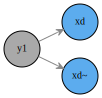

[(0, None), (1, [-2, 1, 3, -1, -3, 2]), (2, [-2, 1, 3, -1, -3, 2])]


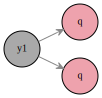

[(0, None), (1, [-2, 1, 3, -1, -3, 2]), (2, [-2, 1, 3, -1, -3, 2])]


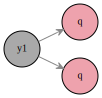

In [30]:
for vertexGraph in vertices:
    print(list(zip(vertexGraph.nodeIndices,vertexGraph.pdg)))
    vertexGraph.draw()